## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns\
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [4]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


#### Preparing X and Y variables

We are gonna predict the math score

In [5]:
X = df.drop(columns= ['math_score'])

In [6]:
X.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
5,female,group B,associate's degree,standard,none,83,78
6,female,group B,some college,standard,completed,95,92
7,male,group B,some college,free/reduced,none,43,39
8,male,group D,high school,free/reduced,completed,64,67
9,female,group B,high school,free/reduced,none,60,50


In [7]:
print("Categories in 'gender' variable:     " ) 
print(df['gender'].unique())

print( "Categories in ' race_ethnicity' varivales :   ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in ' parental_level_of_education' varivales :   ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in ' lunch' varivales :   ", end=" ")
print(df['lunch'].unique())

print("Categories in ' test_preparation_course' varivales :   ", end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:     
['female' 'male']
Categories in ' race_ethnicity' varivales :    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in ' parental_level_of_education' varivales :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in ' lunch' varivales :    ['standard' 'free/reduced']
Categories in ' test_preparation_course' varivales :    ['none' 'completed']


In [8]:

y = df['math_score']

In [9]:
y.head(5)

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [10]:
# Create Column Transformer with 3 types of transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    
    [
        ("OneHotEncoder", oh_transformer,cat_features),
        
        ("StandardScaler",numeric_transformer,num_features),
    ]
    
)


In [11]:
X= preprocessor.fit_transform(X)

In [12]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [13]:
X.shape

(1000, 19)

In [14]:

# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [15]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(
        y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(
        y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3244
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

### Results

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.853672
8,AdaBoost Regressor,0.851779
7,CatBoosting Regressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.756306


## Linear Regression

In [18]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" % score)

 Accuracy of the model is 88.03


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

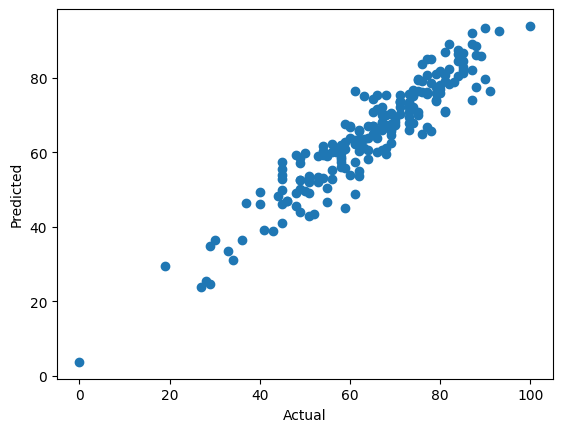

In [19]:

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

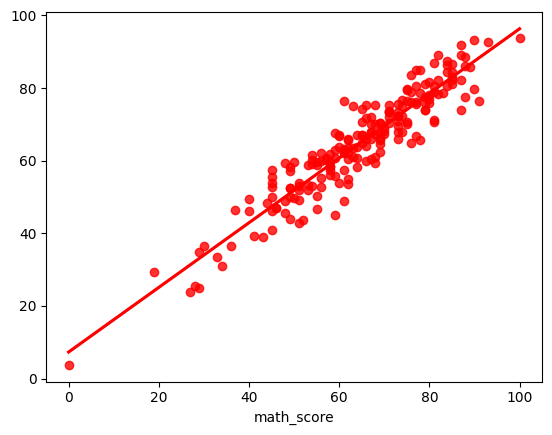

In [20]:
sns.regplot(x=y_test, y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [21]:
pred_df = pd.DataFrame(
    {'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812


In [22]:


import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create a dictionary to store model results
model_results = []

# Evaluate each trained model
for name, model in models.items():
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Append results to list
    model_results.append([name, mae, rmse, r2])

# Convert results to DataFrame
results_df = pd.DataFrame(model_results, columns=[
                          "Model", "MAE", "RMSE", "R²"])

# Sort models by lowest MAE
results_df = results_df.sort_values(by="MAE")



In [23]:
# Display results in Jupyter Notebook
from IPython.display import display
display(results_df)

,Model,MAE,RMSE,R²
2,Ridge,4.211101,5.390387,0.880593
0,Linear Regression,4.215820,5.395987,0.880345
5,Random Forest Regressor,4.609927,5.967170,0.853672
7,CatBoosting Regressor,4.612532,6.008632,0.851632
8,AdaBoost Regressor,4.677604,6.005654,0.851779
6,XGBRegressor,5.057731,6.473307,0.827797
1,Lasso,5.157882,6.519695,0.825320
3,K-Neighbors Regressor,5.621000,7.253041,0.783813
4,Decision Tree,6.130000,7.700649,0.756306


C:\Users\Admin\AppData\Local\Temp\ipykernel_31160\3860938368.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="MAE", palette="Blues_r")
C:\Users\Admin\AppData\Local\Temp\ipykernel_31160\3860938368.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", palette="Oranges_r")
C:\Users\Admin\AppData\Local\Temp\ipykernel_31160\3860938368.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R²", palette="Greens_r")


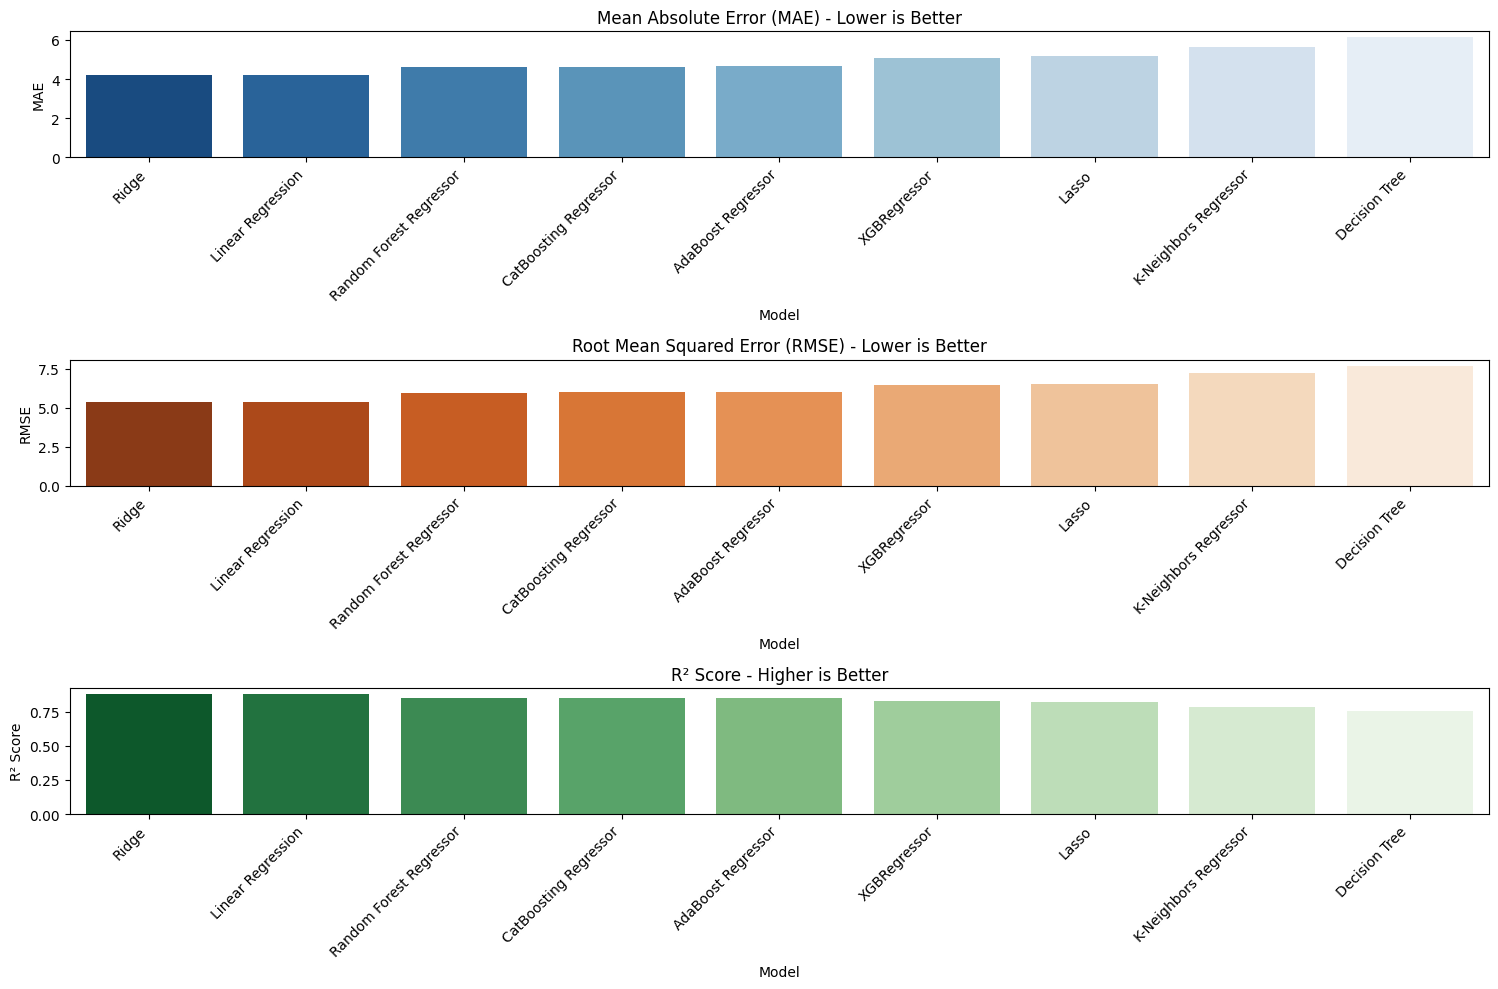

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 10))

# Bar plot for MAE
plt.subplot(3, 1, 1)
sns.barplot(data=results_df, x="Model", y="MAE", palette="Blues_r")
plt.title("Mean Absolute Error (MAE) - Lower is Better")
plt.xticks(rotation=45, ha="right")
plt.ylabel("MAE")

# Bar plot for RMSE
plt.subplot(3, 1, 2)
sns.barplot(data=results_df, x="Model", y="RMSE", palette="Oranges_r")
plt.title("Root Mean Squared Error (RMSE) - Lower is Better")
plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSE")

# Bar plot for R² Score
plt.subplot(3, 1, 3)
sns.barplot(data=results_df, x="Model", y="R²", palette="Greens_r")
plt.title("R² Score - Higher is Better")
plt.xticks(rotation=45, ha="right")
plt.ylabel("R² Score")

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

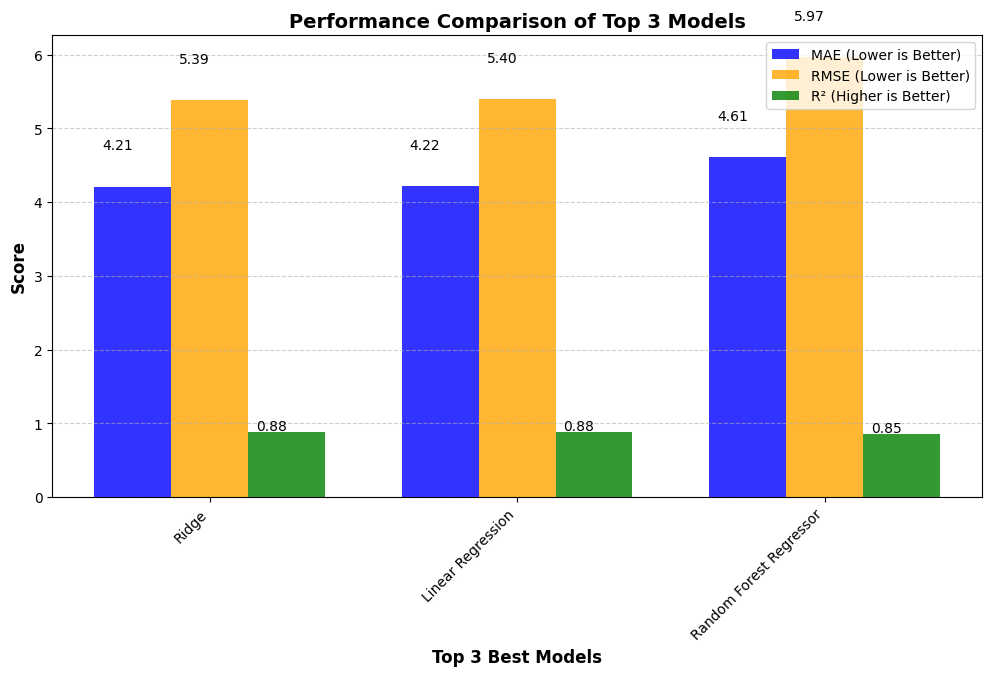

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Selecting the top 3 best-performing models based on the lowest MAE
top_3_models = results_df.nsmallest(3, "MAE")

# Set figure size
plt.figure(figsize=(12, 6))

# Define bar width and positions
bar_width = 0.25
x = np.arange(len(top_3_models))

# Creating grouped bar plots for MAE, RMSE, and R²
plt.bar(x, top_3_models["MAE"], width=bar_width,
        label="MAE (Lower is Better)", color="blue", alpha=0.8)
plt.bar(x + bar_width, top_3_models["RMSE"], width=bar_width,
        label="RMSE (Lower is Better)", color="orange", alpha=0.8)
plt.bar(x + 2 * bar_width, top_3_models["R²"], width=bar_width,
        label="R² (Higher is Better)", color="green", alpha=0.8)

# Formatting the chart
plt.xticks(x + bar_width, top_3_models["Model"], rotation=45, ha="right")
plt.xlabel("Top 3 Best Models", fontsize=12, fontweight="bold")
plt.ylabel("Score", fontsize=12, fontweight="bold")
plt.title("Performance Comparison of Top 3 Models",
          fontsize=14, fontweight="bold")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Adding data labels to the bars
for i in range(len(top_3_models)):
    plt.text(x[i] - 0.05, top_3_models["MAE"].iloc[i] + 0.5,
             f"{top_3_models['MAE'].iloc[i]:.2f}", ha='center', fontsize=10, color="black")
    plt.text(x[i] + bar_width - 0.05, top_3_models["RMSE"].iloc[i] + 0.5,
             f"{top_3_models['RMSE'].iloc[i]:.2f}", ha='center', fontsize=10, color="black")
    plt.text(x[i] + 2 * bar_width - 0.05, top_3_models["R²"].iloc[i] + 0.02,
             f"{top_3_models['R²'].iloc[i]:.2f}", ha='center', fontsize=10, color="black")

# Display the chart
plt.show()